<a href="https://colab.research.google.com/github/Jordy-Rodrigues/M-todo-Descida-do-gradiente/blob/main/Regress%C3%A3o_Linear_Desc_do_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTODO DA  DESCIDA DO GRADIENTE

In [85]:
# BIBLIOTECAS BÁSICAS
import pandas as pd
import numpy as np

In [86]:
# BIBLIOTECA PARA GERAR GRÁFICOS
import matplotlib.pyplot as plt

In [87]:
# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [88]:
# CARREGAR O DATASET
Data = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
Data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'Relação entre peso e autonomia dos veículos')

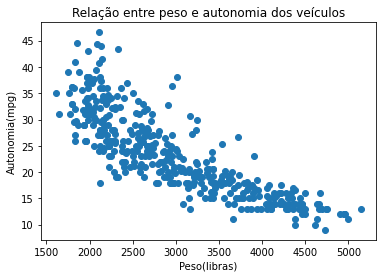

In [89]:
# VISUALIZAR O DATASET EM GRÁFICO DE DISPERÇÃO
plt.scatter(Data[['weight']], Data[['mpg']])
plt.xlabel('Peso(libras)')
plt.ylabel('Autonomia(mpg)')
plt.title('Relação entre peso e autonomia dos veículos')

In [90]:
# DECLARAR MEU X DEPENDETE E MEU Y INDEPENDENTE
x = Data [['weight']]
y = Data [['mpg']]

In [91]:
# MUDAR A MÉDIDA UTILIZADA NO DATASET DE LIBRA PARA KG
x = x * 0.453592 # MULTIPLICAR A VARIÁVEL X PELO VALOR DA MÉDIDA DE CONVERSÃO LIBRA PARA KG
y = y * 0.453592 # MULTIPLICAR A VARIÁVEL Y PELO VALOR DA MÉDIDA DE CONVERSÃO LIBRA PARA KG

In [92]:
# PADRONIZAR AS FEATURES
escala = StandardScaler()
escala.fit(x)
norm = escala.transform(x)

In [93]:
# SEPARAR MINHA BASE DE DADOS EM TREINO E TESTE
x_treino, x_teste, y_treino, y_teste = train_test_split(norm, y, test_size=0.3)

In [94]:
# USAR REGRESSÃO LINEAR DESCIDA DO GRADIENTE E ALGUNS PARÂMETROS
regressão = SGDRegressor(max_iter=500, eta0=0.01, tol=0.0001, verbose=1)

In [95]:
#TREINAR O MODELO
regressão.fit(x_treino, y_treino)

-- Epoch 1
Norm: 2.01, NNZs: 1, Bias: 6.444513, T: 278, Avg. loss: 27.090347
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.54, NNZs: 1, Bias: 8.440901, T: 556, Avg. loss: 7.450060
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 1, Bias: 9.392364, T: 834, Avg. loss: 3.657798
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.86, NNZs: 1, Bias: 9.920278, T: 1112, Avg. loss: 2.586404
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.91, NNZs: 1, Bias: 10.213448, T: 1390, Avg. loss: 2.240317
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.92, NNZs: 1, Bias: 10.382923, T: 1668, Avg. loss: 2.120178
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.93, NNZs: 1, Bias: 10.494261, T: 1946, Avg. loss: 2.074134
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.93, NNZs: 1, Bias: 10.556711, T: 2224, Avg. loss: 2.055402
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 2.93, NNZs: 1, Bias: 10.603326, T: 2502, Avg. loss: 2.047567
Total training time: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=500, tol=0.0001, verbose=1)

PÓS-PROCESSAMENTO

In [99]:
# TESTAR O MODELO COM DADOS QUE ELE NÃO VIU
y_prev = regressão.predict(x_teste)

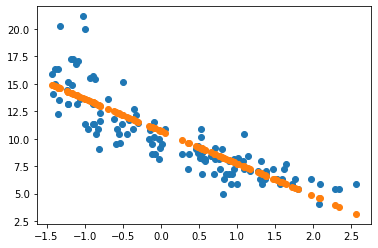

In [100]:
# GERAR GRÁFICO
plt.scatter(x_teste, y_teste, label="Real")
plt.scatter(x_teste, y_prev, label="Previsto")

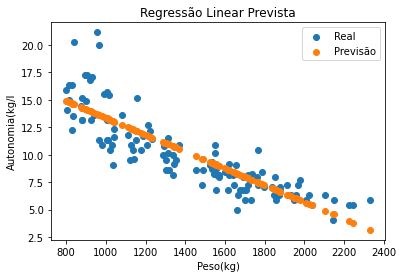

In [104]:
# DEIXAR O GRÁFICO MAIS VISUAL
x_test = escala.inverse_transform(x_teste)
plt.scatter(x_test, y_teste, label="Real")
plt.scatter(x_test, y_prev, label="Previsão")
plt.xlabel("Peso(kg)")
plt.ylabel("Autonomia(kg/l")
plt.title("Regressão Linear Prevista")
plt.legend(loc=1)